<a href="https://colab.research.google.com/github/yuanfeiwo/test-firstrepository/blob/master/Module5_5_8_Supervised_Learning_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns

See [here](https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/SF+LLD+User+Guide+Release+22.pdf) for data definitions published by FreddieMac

In [2]:
df = pd.read_csv('https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/sample_orig_2017.txt', sep='|', low_memory=False, header=None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
0,794,201703,9,204702,24260.0,0,1,P,74,29,129000,74,3.625,R,N,FRM,NE,SF,68800,F117Q1000068,C,360,2,Other sellers,Other servicers,NaN
1,776,201703,N,203202,NaN,0,1,P,50,20,85000,50,3.000,R,N,FRM,OH,SF,44600,F117Q1000079,P,180,1,Other sellers,Other servicers,NaN
2,795,201703,9,203202,49180.0,0,1,P,55,26,143000,55,2.750,R,N,FRM,NC,SF,27200,F117Q1000090,C,180,1,Other sellers,Other servicers,NaN
3,785,201705,9,204704,NaN,30,1,P,95,20,258000,95,4.500,R,N,FRM,OK,SF,74800,F117Q1000113,N,360,2,Other sellers,Other servicers,NaN
4,758,201703,9,203202,24260.0,0,1,P,80,35,117000,80,3.000,R,N,FRM,NE,SF,68800,F117Q1000168,C,180,2,Other sellers,Other servicers,NaN


In [4]:
sns.set(style="whitegrid")

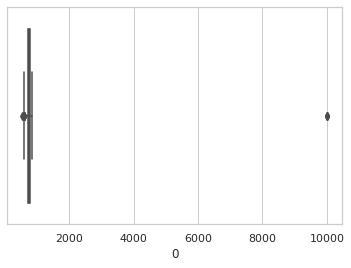

In [5]:
ax = sns.boxplot(x=df[0])

In [6]:
df=df[df[0]< 2000]

[Text(0.5, 0, 'Credit scores')]

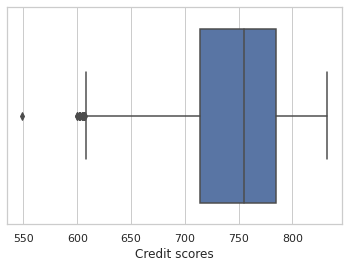

In [7]:
ax = sns.boxplot(x=df[0])
ax.set(xlabel='Credit scores')

[Text(0, 0.5, 'Credit scores'), Text(0.5, 0, 'House type')]

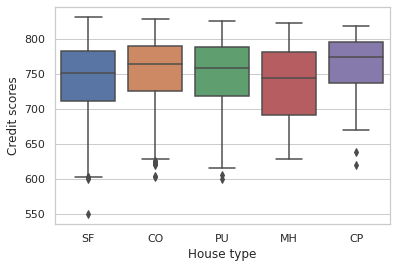

In [8]:
ax = sns.boxplot(x=df[17], y=df[0], data=df)
ax.set(xlabel='House type', ylabel='Credit scores')

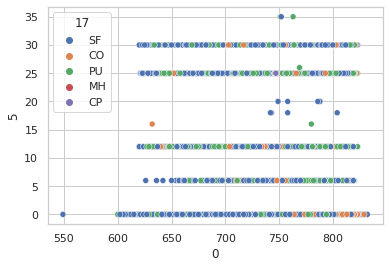

In [9]:
ax = sns.scatterplot(x=df[0], y=df[5],
...                      hue=df[17], data=df)

In [10]:
df=df[df[5]< 999]

[Text(0, 0.5, '% of Loan covered by MI'), Text(0.5, 0, 'Credit scores')]

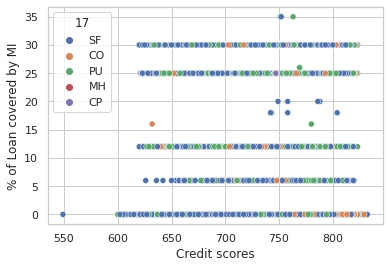

In [11]:
ax = sns.scatterplot(x=df[0], y=df[5],
...                      hue=df[17], data=df)
ax.set(xlabel='Credit scores', ylabel='% of Loan covered by MI')

In [14]:
df.corr()

,0,1,3,4,5,6,8,9,10,11,12,18,21,22
0,1.000000,0.000580,-0.013182,-0.000345,-0.012874,0.005925,-0.040249,-0.103632,0.034763,-0.044533,-0.264902,-0.009958,-0.013193,-0.043353
1,0.000580,1.000000,0.035586,-0.000117,-0.011899,0.001559,-0.005552,0.002048,-0.009172,-0.013168,-0.048449,-0.000893,0.005235,-0.004225
3,-0.013182,0.035586,1.000000,0.028012,0.225716,0.015623,0.228520,0.078603,0.189841,0.241524,0.605232,0.058566,0.999097,-0.029492
4,-0.000345,-0.000117,0.028012,1.000000,-0.024947,-0.001296,-0.020385,0.018007,0.081800,-0.024443,0.029501,0.098669,0.027879,0.013208
5,-0.012874,-0.011899,0.225716,-0.024947,1.000000,-0.078434,0.517552,0.018862,0.094152,0.563605,0.073771,-0.060833,0.226254,-0.002646
6,0.005925,0.001559,0.015623,-0.001296,-0.078434,1.000000,-0.064082,0.070067,0.078153,-0.065837,0.126430,-0.009903,0.015675,-0.019552
8,-0.040249,-0.005552,0.228520,-0.020385,0.517552,-0.064082,1.000000,0.028507,0.141013,0.921262,0.163035,-0.065559,0.228613,-0.010058
9,-0.103632,0.002048,0.078603,0.018007,0.018862,0.070067,0.028507,1.000000,0.093632,0.026967,0.105627,0.045220,0.078576,-0.058266
10,0.034763,-0.009172,0.189841,0.081800,0.094152,0.078153,0.141013,0.093632,1.000000,0.132943,-0.009450,0.153954,0.190132,0.136713
11,-0.044533,-0.013168,0.241524,-0.024443,0.563605,-0.065837,0.921262,0.026967,0.132943,1.000000,0.172714,-0.072313,0.242092,-0.017997


# Exercises

# 1.0 You would like to build a supervised learning algorithm to predict interest rates (Column 12). What features would you use?

# 2.0 Try using Regression, Random Forest and Neural Networks. 
* Which performance metric would you use?
* Do hyper-parameter tuning. Does the model improve?
* Which algorithm works best?

In [48]:
y = df.iloc[:,df.columns.isin([12])]
x = df.loc[:, df.columns.isin([3,21])]

total_samples=len(df)
split = 0.8

x_train = x[0:int(total_samples*split)]
x_test = x[int(total_samples*split):total_samples]
y_train = y[0:int(total_samples*split)]
y_test = y[int(total_samples*split):total_samples]

In [24]:
x

,3,21
0,204702,360
1,203202,180
2,203202,180
3,204704,360
4,203202,180
...,...,...
49995,204806,360
49996,204807,360
49997,204801,360
49998,204809,360


In [36]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from scipy.spatial.distance import cdist

In [32]:

lin_reg_model = LinearRegression() # build model
lin_reg_model= lin_reg_model.fit(x_train, y_train) # train model
R2 = lin_reg_model.score(x_train, y_train) # coefficient of determination
print(lin_reg_model.coef_)

[[-0.00765919  0.06772319]]


In [33]:
def mean_absolute_percentage_error(y_true, y_pred): 
    '''
    Calculates mean absolute error of the true and predicted values.
    '''
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    count = 0
    sum = 0
    for a, p in zip(y_true, y_pred):
        if(a!=0):
            sum+=(abs(a-p)/a)
            count+=1
    return (sum/count) * 100

In [34]:
def view_metrics(y_test, predictions, algorithm, samples, total_samples):
    '''
    Plots the true and predicted values and prints RMS, MAE and MAPE metrics.
    '''
    fig = plt.figure(figsize=(18,5))
    plt.scatter(x=[i for i in range(samples)], y=[x for x in predictions[0:samples]], label='Predicted values')
    plt.scatter(x=[i for i in range(samples)], y=[x[0] for x in y_test.values[0:samples]], label='True values')
    plt.title('True and Predicted values for test dataset - %s' % algorithm)
    plt.legend()
    plt.show()
    
#     fig = plt.figure(figsize=(18,5))
#     plt.scatter(x=[i for i in range(total_samples)], y=[x for x in predictions], label='Predicted values')
#     plt.scatter(x=[i for i in range(total_samples)], y=[x[0] for x in y_test.values], label='True values')
#     plt.title('True and Predicted values for test dataset - %s' % algorithm)
#     plt.legend()
#     plt.show()

    RMS =  np.sqrt(mean_squared_error(y_test, predictions, multioutput='raw_values'))
    MAE = mean_absolute_error(y_test, predictions, multioutput='raw_values')
    MAPE = mean_absolute_percentage_error(y_test, predictions)
    print("Root Mean Squared Error:", RMS)
    print("Mean Absolute Error", MAE) 
    print("Mean Absolute Percentage Error", MAPE)
    return RMS, MAE, MAPE

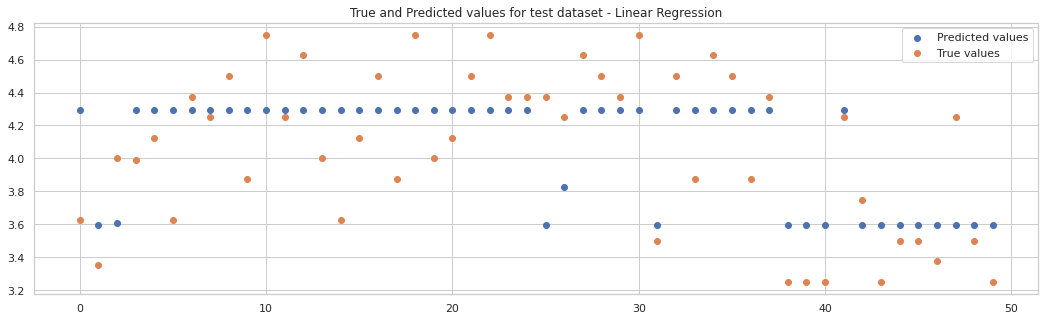

Root Mean Squared Error: [0.55333084]
Mean Absolute Error [0.43869434]
Mean Absolute Percentage Error [10.48353322]


In [37]:
lin_reg_model_predictions = lin_reg_model.predict(x_test) # make predictions
lin_reg_model_metrics = view_metrics(y_test, lin_reg_model_predictions,'Linear Regression', samples = 50, total_samples=2000)


In [38]:
rand_forest_model = RandomForestRegressor(max_depth=5, random_state=0) # build model
rand_forest_model = rand_forest_model.fit(x_train, y_train.values.ravel()) # train model
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)
feature_importance = rand_forest_model.feature_importances_
R2 = rand_forest_model.score(x_train, y_train) # coefficient of determination
rand_forest_model_predictions = rand_forest_model.predict(x_test) # make predictions

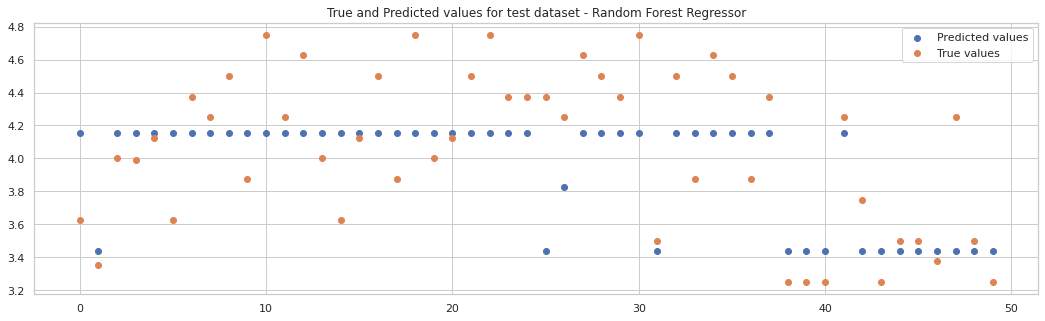

Root Mean Squared Error: [0.36521317]
Mean Absolute Error [0.27344061]
Mean Absolute Percentage Error [6.44741878]


In [39]:
rand_forest_model_metrics = view_metrics(y_test, rand_forest_model_predictions,'Random Forest Regressor', samples = 50, total_samples=2000)


In [40]:
nn_model = MLPRegressor(hidden_layer_sizes=(10,4),
                                    activation='relu', # activation function in the nodes of the neral net
                                    solver='adam', # optimizer algorithm
                                    learning_rate='constant',
                                    learning_rate_init=0.001, # initial learning rate
                                    max_iter=300, # max iterations to train for
                                    tol = -1, # tolerance for when to stop training should be range 0.001 to 0.0000001, -1 for max_iter
                                    shuffle=True,
                                    verbose=True) # show details at each iteration
nn_model = nn_model.fit(x_train, y_train.values.ravel())

Iteration 1, loss = 29622194.96445905
Iteration 2, loss = 39.57322623
Iteration 3, loss = 39.48877244
Iteration 4, loss = 39.36458579
Iteration 5, loss = 39.24221954
Iteration 6, loss = 39.10058378
Iteration 7, loss = 38.91763211
Iteration 8, loss = 38.71326934
Iteration 9, loss = 38.49234649
Iteration 10, loss = 38.21111895
Iteration 11, loss = 37.94078166
Iteration 12, loss = 37.95292505
Iteration 13, loss = 37.25895485
Iteration 14, loss = 36.91524434
Iteration 15, loss = 36.42046182
Iteration 16, loss = 35.99548574
Iteration 17, loss = 35.44935025
Iteration 18, loss = 34.87410684
Iteration 19, loss = 34.31011943
Iteration 20, loss = 33.64413176
Iteration 21, loss = 32.82186726
Iteration 22, loss = 32.05943575
Iteration 23, loss = 31.41423010
Iteration 24, loss = 30.36415549
Iteration 25, loss = 29.33460548
Iteration 26, loss = 28.51637127
Iteration 27, loss = 27.29884113
Iteration 28, loss = 26.20368220
Iteration 29, loss = 25.06541813
Iteration 30, loss = 23.46775406
Iteration 31,

In [41]:
nn_model_predictions = nn_model.predict(x_test)


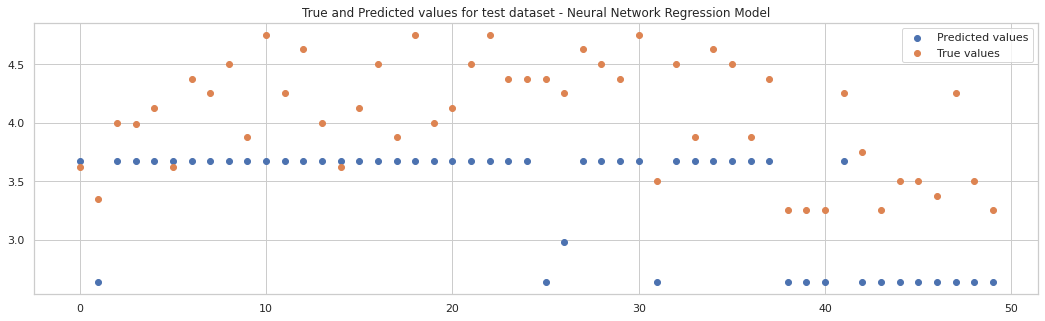

Root Mean Squared Error: [0.76287343]
Mean Absolute Error [0.65778239]
Mean Absolute Percentage Error [15.71643863]


In [42]:
nn_model_metrics = view_metrics(y_test, nn_model_predictions,'Neural Network Regression Model', samples = 50, total_samples=2000)


# 3.0 Try TPOT, AutoSKLearn and H20's Automl to see if you can improve performance. Does the model improve?

In [43]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='3G')

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     |████████████████████████████████| 164.6MB 77kB/s 
  Created wheel for h2o: filename=h2o-3.32.0.2-py2.py3-none-any.whl size=164620456 sha256=1de38f9a112cd5279cc5baacc6eb4084f56d096274ad35b73af1eef5a634ff87
  Stored in directory: /root/.cache/pip/wheels/42/bd/ea/218fd15724eddf6fa7fc8fab802b6fa592e623d87199679721
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.9.1" 2020-11-04; OpenJDK Runtime Environment (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04); OpenJDK 64-Bit Server VM (build 11.0.9.1+1-Ubuntu-0ubuntu1.18.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpdp4kq8ha
  JVM stdout: /tmp/tmpdp4kq8ha/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpdp4kq8ha/h2o_unknownUser

H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.2
H2O_cluster_version_age:,29 days
H2O_cluster_name:,H2O_from_python_unknownUser_8jbsik
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [44]:
import requests
from io import StringIO

In [45]:
hf = h2o.H2OFrame(df)


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [50]:
hf

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25
794,201703,9,204702,24260,0,1,P,74,29,129000,74,3.625,R,N,FRM,NE,SF,68800,F117Q1000068,C,360,2,Other sellers,Other servicers,nan
776,201703,nan,203202,nan,0,1,P,50,20,85000,50,3,R,N,FRM,OH,SF,44600,F117Q1000079,P,180,1,Other sellers,Other servicers,nan
795,201703,9,203202,49180,0,1,P,55,26,143000,55,2.75,R,N,FRM,NC,SF,27200,F117Q1000090,C,180,1,Other sellers,Other servicers,nan
785,201705,9,204704,nan,30,1,P,95,20,258000,95,4.5,R,N,FRM,OK,SF,74800,F117Q1000113,N,360,2,Other sellers,Other servicers,nan
758,201703,9,203202,24260,0,1,P,80,35,117000,80,3,R,N,FRM,NE,SF,68800,F117Q1000168,C,180,2,Other sellers,Other servicers,nan
789,201703,9,203202,21780,0,1,P,59,33,417000,59,3,R,N,FRM,IN,SF,47600,F117Q1000245,C,180,1,Other sellers,Other servicers,nan
807,201703,9,203202,19740,0,1,P,17,19,63000,17,3.125,C,N,FRM,CO,SF,80000,F117Q1000260,N,180,2,Other sellers,"PNCBANK,NATL",nan
772,201704,9,203203,17860,0,1,P,74,42,245000,74,3.25,C,N,FRM,MO,SF,65200,F117Q1000265,N,180,1,USBANKNA,USBANKNA,nan
663,201703,9,203202,38340,0,1,P,52,14,82000,52,3,R,N,FRM,MA,SF,1200,F117Q1000280,C,180,1,Other sellers,Other servicers,nan
710,201703,nan,204702,16580,0,1,P,79,27,90000,79,3.5,R,N,FRM,IL,SF,61800,F117Q1000283,P,360,1,Other sellers,Other servicers,nan


In [46]:
splits = hf.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]

In [51]:
y='12'

In [52]:
aml = H2OAutoML(max_runtime_secs =600, seed = 1, project_name = "H2O_finance")
aml.train(y = y, training_frame = train, leaderboard_frame = test)

AutoML progress: |██████████████████
16:37:28.284: XRT_1_AutoML_20201216_163419 [DRF XRT (Extremely Randomized Trees)] failed: java.lang.AssertionError

██████████████████████████████████████| 100%


In [53]:
aml.leaderboard.head()


model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20201216_163419,0.0505855,0.224912,0.0505855,0.169614,0.0437262
StackedEnsemble_BestOfFamily_AutoML_20201216_163419,0.0507998,0.225388,0.0507998,0.17001,0.0438204
GBM_grid__1_AutoML_20201216_163419_model_2,0.0510318,0.225902,0.0510318,0.170409,0.0439251
GBM_grid__1_AutoML_20201216_163419_model_1,0.0518328,0.227668,0.0518328,0.171767,0.044277
XGBoost_3_AutoML_20201216_163419,0.0531393,0.23052,0.0531393,0.174815,0.0448086
XGBoost_1_AutoML_20201216_163419,0.0542276,0.232868,0.0542276,0.176035,0.0453025
XGBoost_grid__1_AutoML_20201216_163419_model_2,0.055267,0.235089,0.055267,0.178308,0.0457242
XGBoost_grid__1_AutoML_20201216_163419_model_1,0.0558721,0.236373,0.0558721,0.178469,0.046029
XGBoost_2_AutoML_20201216_163419,0.0572297,0.239227,0.0572297,0.181389,0.0464744
GBM_3_AutoML_20201216_163419,0.0579151,0.240656,0.0579151,0.182879,0.0468571


In [54]:
perf = aml.leader.model_performance(test)
perf



ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.050585535372284364
RMSE: 0.22491228372920044
MAE: 0.16961429080569887
RMSLE: 0.04372620552260981
R^2: 0.7440021311421577
Mean Residual Deviance: 0.050585535372284364
Null degrees of freedom: 9954
Residual degrees of freedom: 9947
Null deviance: 1967.2008449461414
Residual deviance: 503.5790046310908
AIC: -1437.545829264887


In [55]:
y_test = test[y]
y_train = train[y]

In [56]:
y_test_vals = y_test.as_data_frame().values.ravel()
y_test_pred_vals = aml.leader.predict(test).as_data_frame().values.ravel()

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [57]:
y_train_vals = y_train.as_data_frame().values.ravel()
y_train_pred_vals = aml.leader.predict(train).as_data_frame().values.ravel()

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [58]:
mape_test = mean_absolute_percentage_error(y_test_vals,y_test_pred_vals )
mape_train = mean_absolute_percentage_error(y_train_vals,y_train_pred_vals )

In [59]:
print("Training-set MAPE: "+str(mape_train))
print("Test-set MAPE: "+str(mape_test))

Training-set MAPE: 3.396836041370043
Test-set MAPE: 4.10685521010261


In [60]:
y_test_vals[0:5]

array([2.75 , 3.5  , 2.875, 4.125, 4.375])

In [61]:
y_test_pred_vals[0:5]

array([3.48481534, 4.35302972, 3.78878411, 4.12929848, 4.39780547])